In [36]:
# @title import list

import datetime as dt
from urllib.request import urlopen
import bs4
import re
import pandas as pd
import requests as req
import matplotlib.pyplot as plt
import datetime as dt

In [37]:
# @title KOSPI TOP 10 종목

top10_kospi = {
    "005930": "삼성전자",
    "000660": "SK하이닉스",
    "005935": "삼성전자우",
    "005380": "현대차",
    "373220": "LG에너지솔루션",
    "207940": "삼성바이오로직스",
    "402340": "SK스퀘어",
    "000270": "기아",
    "034020": "두산에너빌리티",
    "012450": "한화에어로스페이스"
}

In [38]:
# @title 기본설정

headers = {'User-Agent': 'Mozilla/5.0'}
k10_comp = top10_kospi.keys()
k10_outstanding = {}
k10_floating = {}
k10_name = {}
k10_per = {}
k10_pbr = {}
k10_eps = {}
k10_bps = {}

In [39]:
# @title stock_info Backtesting Code

'''
url = f"https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=005930"

response = req.get(url, headers=headers).text
soup = bs4.BeautifulSoup(response, 'lxml')

#Stock Name
name = soup.find('span', class_="name").text.strip()

#EPS,BPS,PER,PBR
td = soup.find("td", class_="td0301")
nums_list = td.find_all("b", class_="num")
EPS = int(nums_list[0].text.strip().replace(',',''))
BPS = int(nums_list[1].text.strip().replace(',',''))
PER = float(nums_list[2].text.strip())
PBR = float(nums_list[4].text.strip())

#발행주식수, 유동비율
th_list = [th.text.strip() for th in soup.find_all('th')]
tmp = soup.find_all('td', class_='num')[th_list.index('발행주식수/유동비율')].text.strip()
outstanding, floating = tmp.split('/')
outstanding = outstanding.replace(',','').replace('주','')
floating = float(floating.replace('%',''))
'''

'\nurl = f"https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=005930"\n\nresponse = req.get(url, headers=headers).text\nsoup = bs4.BeautifulSoup(response, \'lxml\')\n\n#Stock Name\nname = soup.find(\'span\', class_="name").text.strip()\n\n#EPS,BPS,PER,PBR\ntd = soup.find("td", class_="td0301")\nnums_list = td.find_all("b", class_="num")\nEPS = int(nums_list[0].text.strip().replace(\',\',\'\'))\nBPS = int(nums_list[1].text.strip().replace(\',\',\'\'))\nPER = float(nums_list[2].text.strip())\nPBR = float(nums_list[4].text.strip())\n\n#발행주식수, 유동비율\nth_list = [th.text.strip() for th in soup.find_all(\'th\')]\ntmp = soup.find_all(\'td\', class_=\'num\')[th_list.index(\'발행주식수/유동비율\')].text.strip()\noutstanding, floating = tmp.split(\'/\')\noutstanding = outstanding.replace(\',\',\'\').replace(\'주\',\'\')\nfloating = float(floating.replace(\'%\',\'\'))\n'

In [40]:
# @title stock_info(stock_cd)

def stock_info(stock_cd):
  try:
    loc_url = f"https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={stock_cd}"

    loc_response = req.get(loc_url, headers=headers).text
    loc_soup = bs4.BeautifulSoup(loc_response, 'lxml')

    #Stock Name
    loc_name = loc_soup.find('span', class_="name").text.strip()

    #EPS,BPS,PER,PBR
    loc_td = loc_soup.find("td", class_="td0301")
    loc_nums_list = loc_td.find_all("b", class_="num")
    loc_EPS = int(loc_nums_list[0].text.strip().replace(',',''))
    loc_BPS = int(loc_nums_list[1].text.strip().replace(',',''))
    loc_PER = loc_nums_list[2].text.strip()
    loc_PBR = loc_nums_list[4].text.strip()

    for i in loc_PER, loc_PBR:
      if isinstance(i, float):
        i = float(i)


    #발행주식수, 유동비율
    loc_th_list = [th.text.strip() for th in loc_soup.find_all('th')]
    loc_tmp = loc_soup.find_all('td', class_='num')[loc_th_list.index('발행주식수/유동비율')].text.strip()
    loc_outstanding, loc_floating = loc_tmp.split('/')
    loc_outstanding = float(loc_outstanding.replace(',','').replace('주',''))
    loc_floating = float(loc_floating.replace('%',''))

    k10_name[stock_cd] = loc_name
    k10_eps[stock_cd] = loc_EPS
    k10_bps[stock_cd] = loc_BPS
    k10_per[stock_cd] = loc_PER
    k10_pbr[stock_cd] = loc_PBR
    k10_outstanding[stock_cd] = loc_outstanding
    k10_floating[stock_cd] = loc_floating
  except Exception as e:
    print(f'{top10_kospi[stock_cd]}에서 {e}로 인한 에러 발생')

In [41]:
# @title k10_DataFrame

df = {'Name' : k10_name,
      "Outstanding" : k10_outstanding,
      'Floating' : k10_floating,
      'PER' : k10_per,
      'PBR' : k10_pbr,
      'EPS' : k10_eps,
      'BPS' : k10_bps}

for stock_cd in k10_comp:
  print(top10_kospi[stock_cd])
  stock_info(stock_cd)
k10_info = pd.DataFrame(df)
k10_info

삼성전자
SK하이닉스
삼성전자우
현대차
LG에너지솔루션
삼성바이오로직스
SK스퀘어
기아
두산에너빌리티
한화에어로스페이스


,Name,Outstanding,Floating,PER,PBR,EPS,BPS
005930,삼성전자,5.919638e+09,75.08,32.99,3.38,6564,63997
000660,SK하이닉스,7.127024e+08,75.23,21.64,7.33,49038,144811
005935,삼성전자,5.919638e+09,75.08,32.99,3.38,6564,63997
005380,현대차,2.047578e+08,65.73,16.94,1.55,39785,435878
373220,LG에너지솔루션,2.340000e+08,20.15,N/A,4.87,-3742,87699
207940,삼성바이오로직스,4.629095e+07,25.57,66.91,11.05,26572,160963
402340,SK스퀘어,1.320871e+08,67.53,12.23,3.49,52740,184750
000270,기아,3.904130e+08,60.41,10.43,1.35,19704,151966
034020,두산에너빌리티,6.405611e+08,69.10,N/A,8.84,-159,12030
012450,한화에어로스페이스,5.156340e+07,62.66,21.84,6.83,54715,174972


In [42]:
# @title date_format

def date_format(d):
  if d == 'today':
    return dt.date.today()
  elif isinstance(d, dt.datetime) or isinstance(d, dt.date):
    return d
  else:
    loc_d_str = str(d).split(' ')[0]
    loc_d_str = loc_d_str.replace('/','.').replace('-','.')
    loc_list_d = loc_d_str.split('.')
    loc_yyyy = int(loc_list_d[0])
    loc_mm = int(loc_list_d[1])
    loc_dd = int(loc_list_d[2])

    loc_date = dt.datetime(loc_yyyy, loc_mm, loc_dd).date()
    return loc_date

In [43]:
# @title date and price list backtesting code

'''
url_day = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'

response = req.get(url_day, headers=headers).text
soup = bs4.BeautifulSoup(response, "lxml")

#dates
date_tag_list = soup.find_all("span", class_="tah p10 gray03")
dates = [i.text.strip() for i in date_tag_list]

#prices
price_tag_list = soup.find_all('span', class_='tah p11')
tmp = [i.text.strip() for i in price_tag_list]
if 0 in tmp:
  tmp.remove('0')
prices = []
for i in range(len(tmp)):
  if i % 5 == 0 :
    prices.append(tmp[i])
'''

'\nurl_day = \'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1\'\n\nresponse = req.get(url_day, headers=headers).text\nsoup = bs4.BeautifulSoup(response, "lxml")\n\n#dates\ndate_tag_list = soup.find_all("span", class_="tah p10 gray03")\ndates = [i.text.strip() for i in date_tag_list]\n\n#prices\nprice_tag_list = soup.find_all(\'span\', class_=\'tah p11\')\ntmp = [i.text.strip() for i in price_tag_list]\nif 0 in tmp:\n  tmp.remove(\'0\')\nprices = []\nfor i in range(len(tmp)):\n  if i % 5 == 0 :\n    prices.append(tmp[i])\n'

In [44]:
# @title historical_stock_naver

def historical_stock_naver(stock_cd, start_date="", end_date="", page_n=1, last_page=0):

# -------------------------------------------------------------------------

  # date 변수타입 설정
  if start_date:
    start_date = date_format(start_date)
  else:
    start_date = date_format('today')
  if end_date:
    end_date = date_format(end_date)
  else:
    end_date = date_format('today')

# -------------------------------------------------------------------------

  # url 소스 코드 읽기
  loc_url_day = f"https://finance.naver.com/item/sise_day.nhn?code={stock_cd}&page={page_n}"

  loc_response = req.get(loc_url_day, headers=headers).text
  loc_soup = bs4.BeautifulSoup(loc_response, "lxml")

  #dates
  loc_date_tag_list = loc_soup.find_all("span", class_="tah p10 gray03")
  loc_dates = [i.text.strip() for i in loc_date_tag_list]

  #prices
  loc_price_tag_list = loc_soup.find_all('span', class_='tah p11')
  loc_tmp = [i.text.strip() for i in loc_price_tag_list]
  if '0' in loc_tmp:
    loc_tmp.remove('0')
  loc_prices = []
  for loc_n in range(len(loc_tmp)):
    if loc_n % 5 == 0 :
      loc_prices.append(loc_tmp[loc_n])

# -------------------------------------------------------------------------

  #dictionary 생성
  for loc_n in range(len(loc_dates)):
    if len(loc_dates)>0:

      #Dates Process
      loc_this_date = date_format(loc_dates[loc_n])
      if loc_this_date <= end_date and loc_this_date >= start_date:

        #Prices Process
        loc_this_close = float(str(loc_prices[loc_n]).replace(',',''))

        #Save the dictionary
        historical_prices[loc_this_date] = loc_this_close
      elif loc_this_date < start_date:
        return historical_prices

# -------------------------------------------------------------------------

  # page 처리
  if last_page == 0:
    last_page = loc_soup.find("td", class_="pgRR").find("a")["href"]
    last_page = last_page.split("&")[1]
    last_page = last_page.split("=")[1]
    last_page = int(last_page)

  if page_n < last_page:
    page_n = page_n+1
    return historical_stock_naver(stock_cd, start_date, end_date, page_n, last_page)

  return historical_prices

In [45]:
k10_historical_prices = {}

for stock_cd in k10_comp:
  historical_prices = {}
  start_date = '2026-1-1'
  end_date = '2026-2-25'
  historical_prices = historical_stock_naver(stock_cd, start_date, end_date)

  k10_historical_prices[stock_cd] = historical_prices

In [46]:
k10_historical_prices
k10_historical_prices = pd.DataFrame(k10_historical_prices)
k10_historical_mc = k10_historical_prices*k10_info['Outstanding']*k10_info['Floating']
k10 = pd.DataFrame()
k10['Market Cap'] = k10_historical_mc.sum(axis=1).sort_index()

if start_date in k10.index:
  base_date = start_date
elif start_date not in k10.index:
  base_date = k10.index[len(k10)-1]
k10['Index'] = k10['Market Cap'] / k10['Market Cap'][base_date] * 100

In [47]:
# @title graph setting

plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['lines.antialiased'] = True

C:\Users\to-to\AppData\Local\Temp\ipykernel_27316\207591551.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0)


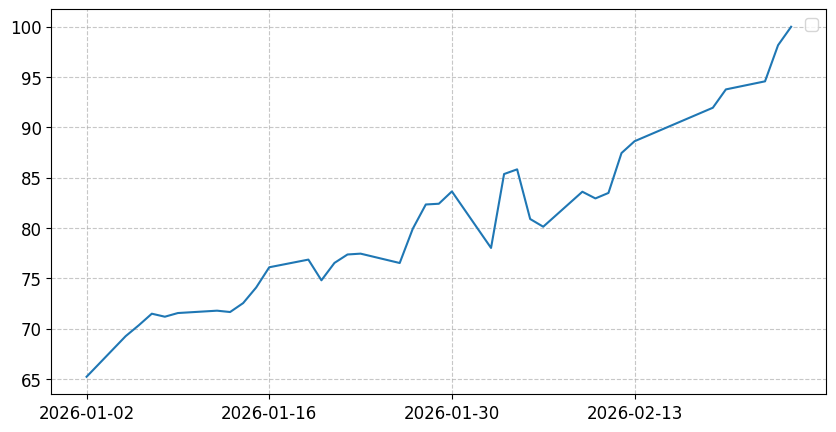

In [48]:
fig, ax = plt.subplots()
ax.plot(k10.index, k10["Index"])
plt.xticks(k10.index[::10])
plt.legend(loc=0)
plt.grid(True)

In [49]:
# @title his_index_naver

def his_index_naver(index_cd, start_date = "", end_date="", page_n=1, last_page=0):
  if start_date:
    start_date = date_format(start_date)
  else:
    start_date = dt.date.today()

  if end_date:
    end_date = date_format(end_date)
  else:
    end_date = dt.date.today()

  loc_naver_index = "https://finance.naver.com/sise/sise_index_day.naver?code=" + index_cd + "&page=" + str(page_n)
  loc_source = urlopen(loc_naver_index).read()
  loc_source = bs4.BeautifulSoup(loc_source,"lxml")
  loc_dates = loc_source.find_all("td", class_="date")
  loc_prices = loc_source.find_all("td", class_= "number_1")

  for loc_n in range(len(loc_dates)):
    if loc_dates[loc_n].text.split('.')[0].isdigit():
      #Dates Process
      loc_this_date = loc_dates[loc_n].text
      loc_this_date = date_format(loc_this_date)
      if loc_this_date <= end_date and loc_this_date >= start_date:
        #Prices Process
        loc_this_close = loc_prices[loc_n*4].text
        loc_this_close = loc_this_close.replace(',','')
        loc_this_close = float(loc_this_close)
        #Save the dictionary
        historical_prices[loc_this_date] = loc_this_close
      elif loc_this_date < start_date:
        return historical_prices

  if last_page == 0:
    last_page = loc_source.find("td", class_="pgRR").find("a")["href"]
    last_page = last_page.split("&")[1]
    last_page = last_page.split("=")[1]
    last_page = int(last_page)

  #Recall the next page
  if page_n < last_page:
    page_n = page_n+1
    return his_index_naver(index_cd, start_date, end_date, page_n, last_page)

  return historical_prices

In [50]:
index_cd = 'KPI200'

historical_prices = {}
start_date = '2026-1-1'
end_date = 'today'
kospi200 = his_index_naver(index_cd, start_date)
k200 = pd.DataFrame({'Index' : kospi200}, index=k10.index).sort_index()
k200.head(3)

,Index
2026-01-02,624.17
2026-01-05,648.74
2026-01-06,659.45


In [51]:
try: k10['Adj Index'] = k10['Market Cap']/k10['Market Cap'][base_date]*k200['Index'][base_date]

except Exception as e:
  print(f'에러 원인: {e}')

([<matplotlib.axis.XTick at 0x20919565d10>,
 [Text(20455.0, 0, '2026-01-02'),
  Text(20469.0, 0, '2026-01-16'),
  Text(20483.0, 0, '2026-01-30'),
  Text(20497.0, 0, '2026-02-13')])

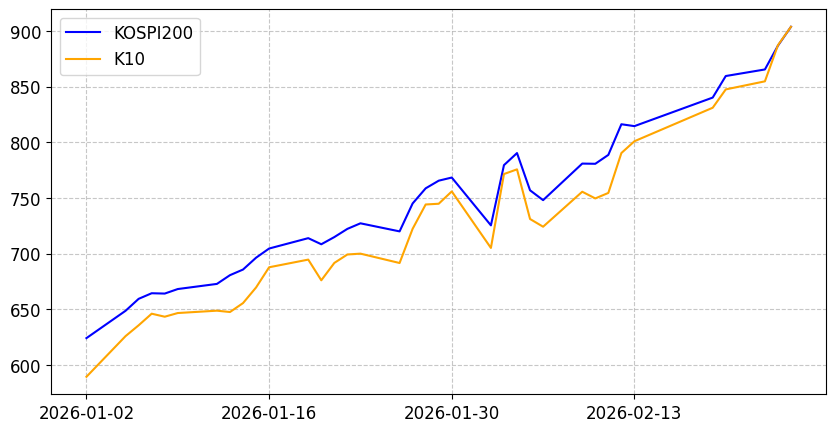

In [52]:
fig, ax = plt.subplots()
ax.plot(k200['Index'], color = 'blue', label = 'KOSPI200')
ax.plot(k10['Adj Index'], color = 'orange', label = 'K10')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(k10.index[::10])

In [53]:
import numpy as np

In [54]:
CU = 50*(10**4)
intended_base_date = dt.date(2026,1,2) # Original intended base date
volume = 100*(10**4)
interest_rate = 0.025

valid_dates_in_k200 = k200.index[k200.index >= intended_base_date]
if not valid_dates_in_k200.empty:
    base_date = valid_dates_in_k200[0]
else:
    base_date = k200.index[-1]

In [55]:
def creation_redemption(v):
  creation = np.random.randint(0,5)*CU
  if v > 50*(10**4):
    redemption = np.random.randint(0,5)*CU
  else:
    redemption=0
  volume = v + creation - redemption

  return(creation, redemption, volume)

In [56]:
k10_stock_ratio = pd.DataFrame()
k10_sum = np.array(k10_historical_mc).sum(axis=1, keepdims=True)
k10_stock_ratio = k10_historical_mc/k10_sum

In [57]:
Fund_NAV = pd.DataFrame()
Fund_Chg = pd.DataFrame()

stock_holdings = np.array([0.0]*10)
NAV_cash = 0.0
current_volume = volume

etf_price_at_base = k200['Index'][base_date] * 100

daily_nav_records = []
daily_fund_chg_records = []

for d_str in sorted(k10_historical_prices.index):
    d = pd.to_datetime(d_str).date()

    if d < base_date:
        continue

    stock_price = np.array(k10_historical_prices.loc[d_str])
    stock_weight = np.array(k10_stock_ratio.loc[d_str])

    NAV_stock_start_day = sum(stock_holdings * stock_price)
    NAV_start_day_total = NAV_stock_start_day + NAV_cash

    if current_volume == 0 and d > base_date:
        etf_pr = etf_price_at_base
    elif d == base_date:
        etf_pr = etf_price_at_base
    else:
        etf_pr = NAV_start_day_total / current_volume

    if d == base_date:
        volume_chg = current_volume
        creation_amount = volume_chg
        redemption_amount = 0
        aum_chg = etf_pr * volume_chg

    else:
        creation_amount, redemption_amount, next_volume_after_cr = creation_redemption(current_volume)
        volume_chg = creation_amount - redemption_amount
        current_volume = next_volume_after_cr
        aum_chg = etf_pr * volume_chg

    # Calculate theoretical stock trades required for creation/redemption
    calculated_Q_stock_trade = np.where(stock_price != 0, np.floor(aum_chg * stock_weight / stock_price), 0)

    # --- MODIFICATION START: Apply constraint to prevent negative stock holdings ---
    actual_Q_stock_trade = np.copy(calculated_Q_stock_trade)

    # Identify indices where shares are to be sold (Q_stock_trade is negative)
    sell_indices = np.where(actual_Q_stock_trade < 0)[0]

    for idx in sell_indices:
        # Ensure we don't sell more shares than currently held
        # actual_Q_stock_trade[idx] is negative for sales. -stock_holdings[idx] is the maximum negative quantity we can sell.
        actual_Q_stock_trade[idx] = max(actual_Q_stock_trade[idx], -stock_holdings[idx])

    stock_holdings += actual_Q_stock_trade

    trade_amt = sum(actual_Q_stock_trade * stock_price)
    cash_flow_from_trade = aum_chg - trade_amt
    # --- MODIFICATION END ---

    NAV_cash = np.floor(NAV_cash * np.exp(interest_rate / 365))
    NAV_cash += cash_flow_from_trade

    NAV_stock_end_day = sum(stock_holdings * stock_price)
    NAV_end_day_total = NAV_stock_end_day + NAV_cash

    daily_nav_records.append({
        'Date': d,
        'Stock': NAV_stock_end_day,
        'Cash': NAV_cash,
        'Total': NAV_end_day_total,
        'Price': etf_pr
    })
    daily_fund_chg_records.append({
        'Date': d,
        'Creation': creation_amount,
        'Redemption': redemption_amount,
        'Volume Change': volume_chg,
        'AUM Change': aum_chg,
        'Trade Amount': trade_amt,
        'Cash Flow Change': cash_flow_from_trade,
        'Current Volume': current_volume
    })

Fund_NAV = pd.DataFrame(daily_nav_records).set_index('Date')
Fund_Chg = pd.DataFrame(daily_fund_chg_records).set_index('Date')

In [58]:
Fund_NAV

,Stock,Cash,Total,Price
Date,,,,
2026-01-02,6.241499e+10,2.010400e+06,6.241700e+10,62417.000000
2026-01-05,3.313780e+10,5.135937e+06,3.314294e+10,66285.876200
2026-01-06,1.682764e+11,7.535636e+06,1.682840e+11,67313.579874
2026-01-07,1.026142e+11,1.051708e+07,1.026247e+11,68416.444574
2026-01-08,1.703117e+11,1.240485e+07,1.703241e+11,68129.639652
2026-01-09,2.396638e+11,1.443342e+07,2.396782e+11,68479.484219
2026-01-12,2.747985e+11,1.634547e+07,2.748148e+11,68703.700919
2026-01-13,2.057052e+11,2.000217e+07,2.057252e+11,68575.078416
2026-01-14,2.082522e+11,2.000354e+07,2.082722e+11,69424.070423


In [59]:
Fund_NAV.head()

,Stock,Cash,Total,Price
Date,,,,
2026-01-02,6.241499e+10,2.010400e+06,6.241700e+10,62417.000000
2026-01-05,3.313780e+10,5.135937e+06,3.314294e+10,66285.876200
2026-01-06,1.682764e+11,7.535636e+06,1.682840e+11,67313.579874
2026-01-07,1.026142e+11,1.051708e+07,1.026247e+11,68416.444574
2026-01-08,1.703117e+11,1.240485e+07,1.703241e+11,68129.639652


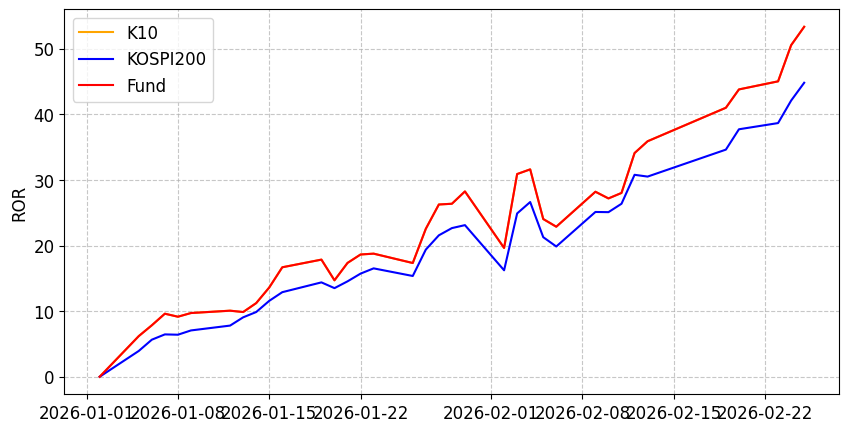

In [60]:
Earnings = pd.DataFrame()
Earnings['K10'] = (k10['Index']-k10['Index'][base_date])/k10['Index'][base_date]*100
Earnings['KOSPI200'] = (k200['Index']-k200['Index'][base_date])/k200['Index'][base_date]*100
Earnings['Fund'] = (Fund_NAV['Price']-Fund_NAV['Price'][base_date])/Fund_NAV['Price'][base_date]*100

ax=Earnings.plot(color=['orange', 'blue', 'red'])
ax.legend(loc=0)
ax.set_ylabel('ROR')
ax.grid(True)


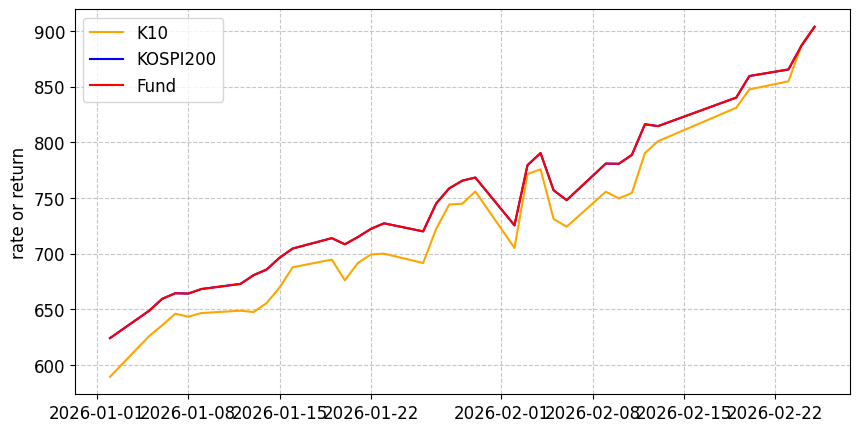

In [62]:
Indicator = pd.DataFrame()
Indicator['K10'] = k10['Adj Index']
Indicator['KOSPI200'] = k200['Index']
Indicator['Fund'] = k200['Index']
ax = Indicator.plot(color=['orange', 'blue', 'red'])
ax.legend(loc='best')
ax.set_ylabel('rate or return')
ax.grid(True)

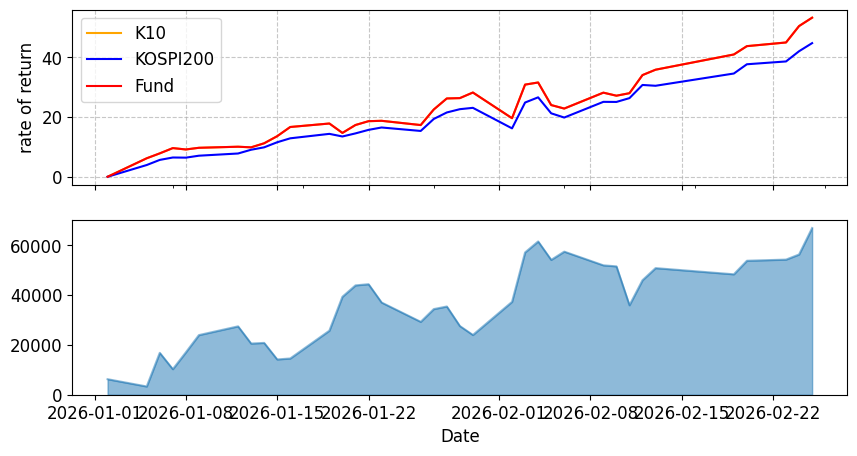

In [63]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
Earnings.plot.line(ax=ax1,color=['orange', 'b', 'r'])
ax1.set_ylabel('rate of return')
Fund_NAV['Display'] = Fund_NAV['Total']*10**(-7)
Fund_NAV['Display'].plot.area(ax=ax2, stacked=False, sharex=True)
ax.set_ylabel('Nav, 억원')
ax1.grid(True)

Text(0, 0.5, '%')

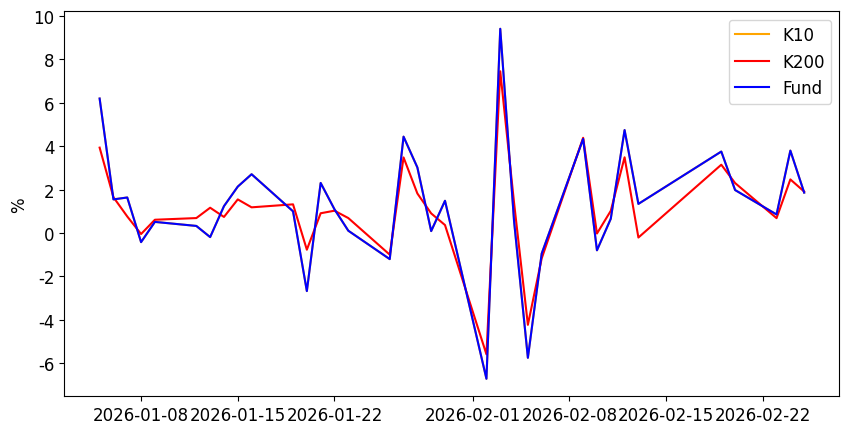

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
Daily = pd.DataFrame()
Daily['K10'] = (k10['Index']-k10['Index'].shift(1))/k10['Index'].shift(1)*100
Daily['K200'] = (k200['Index']-k200['Index'].shift(1))/k200['Index'].shift(1)*100
Daily['Fund'] = (Fund_NAV['Price']-Fund_NAV['Price'].shift(1))/Fund_NAV['Price'].shift(1)*100
Daily.plot(ax=ax, color=['orange','red','blue'])
ax.set_ylabel('%')

<Axes: >

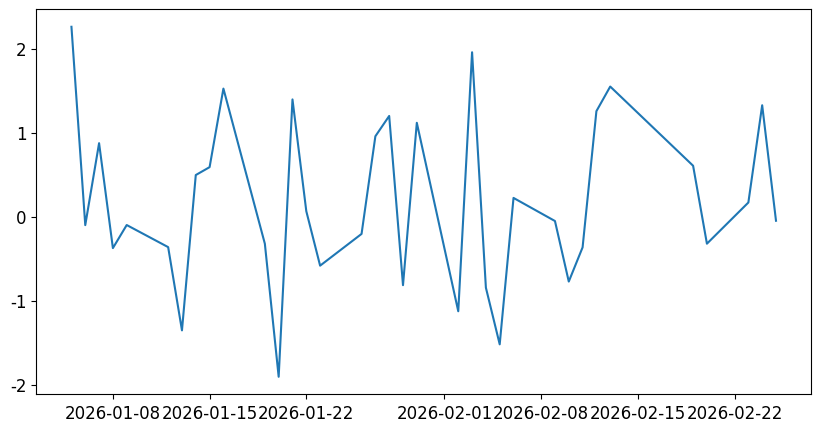

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
Daily['TE200'] = Daily['Fund']-Daily['K200']
Daily['TE200'].plot(ax=ax)

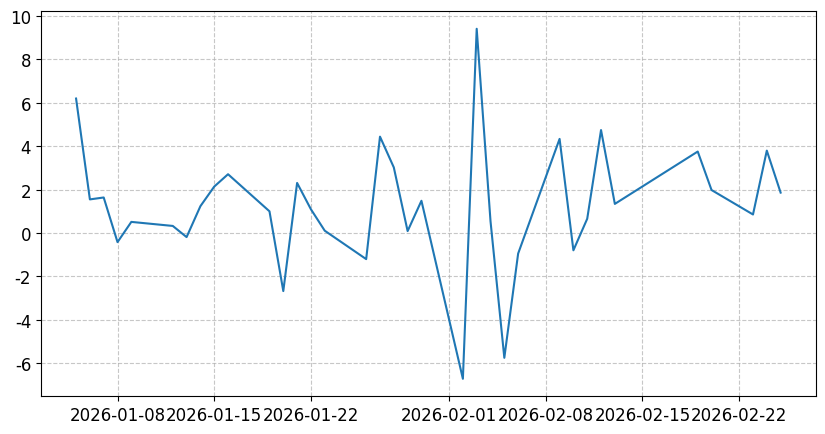

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
Daily['TE10'] = Daily['Fund']-Daily["K10"]
Daily['K10'].plot(ax=ax)
ax.grid(True)